In [36]:
import networkx as nx
import operator

### Degree distribution

In [22]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label=1)

In [23]:
degrees = G.degree()
degree_values = sorted(set(dict(degrees).values()))

In [24]:
histogram = [list(dict(degrees).values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

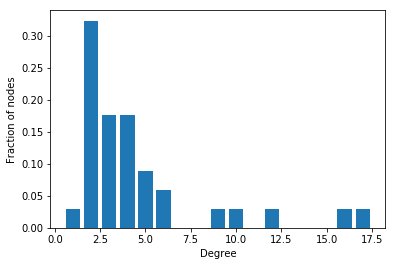

In [25]:
import matplotlib.pyplot as plt
plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()

### In-degree distribution

In [24]:
G2 = nx.DiGraph()
G2.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'D'), ('D', 'C')])

In [28]:
in_degrees = G2.in_degree()
in_degree_values = sorted(set(dict(in_degrees).values()))
histogram = [list(dict(in_degrees).values()).count(i)/float(nx.number_of_nodes(G2)) for i in in_degree_values]

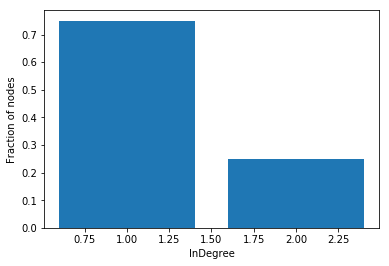

In [29]:
import matplotlib.pyplot as plt
plt.bar(in_degree_values, histogram)
plt.xlabel('InDegree')
plt.ylabel('Fraction of nodes')
plt.show()

### Barapashi-Albert graph

In [30]:
BAG = nx.barabasi_albert_graph(n=10000, m=1)
#n - количество вершин
#m - количество вершин, к которым присоединяется новая вершина

In [31]:
degrees = BAG.degree()
degree_values = sorted(set(dict(degrees).values()))
histogram = [list(dict(degrees).values()).count(i)/float(nx.number_of_nodes(BAG)) for i in degree_values]

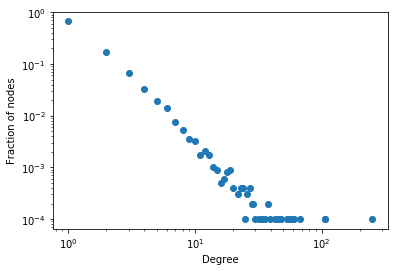

In [34]:
plt.plot(degree_values, histogram, 'o') #'o' - не соединять точки
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Barabashi-Albert model and theory of 6 handshakes

В больших группах людей, например, в социальных сетях, наблюдается два свойства:
    - маленькая средняя длина пути
    - высокий кластерный коэффициент

Нужно найти такую модель, которая бы порождала такие сети.
Проверим, имеет ли эти два свойства уже придуманная модель Барабаши-Альберта.

In [2]:
G = nx.barabasi_albert_graph(1000, 4)

In [3]:
print(nx.average_clustering(G)) #not high enough average clustering coefficient

0.03359638702826504


In [4]:
print(nx.average_shortest_path_length(G)) #small enough average path length 
#потому что есть несколько суперпопулярных вершин

3.1717617617617617


### Small World model

In [26]:
G = nx.watts_strogatz_graph(1000, 6, 0.04)
degrees = G.degree()
degrees_values = sorted(set(dict(degrees).values()))

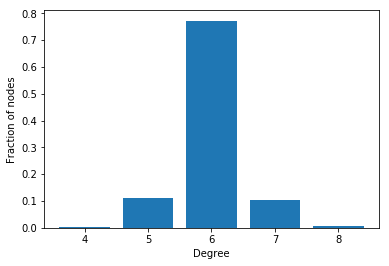

In [28]:
histogram = [list(dict(degrees).values()).count(i)/float(nx.number_of_nodes(G)) for i in degrees_values]
plt.bar(degrees_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()

### Link prediction

Задача: оценить, насколько вероятно появление ребра между вершинами Х и У. Для этого используют 7 различных мер.

In [34]:
list(nx.common_neighbors(G, 0, 1))

[999, 2, 998, 3]

In [41]:
L = list(nx.jaccard_coefficient(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L

[(563, 564, 0.6666666666666666),
 (71, 72, 0.5714285714285714),
 (117, 118, 0.5714285714285714),
 (119, 120, 0.5714285714285714),
 (137, 138, 0.5714285714285714),
 (154, 155, 0.5714285714285714),
 (188, 189, 0.5714285714285714),
 (194, 195, 0.5714285714285714),
 (208, 209, 0.5714285714285714),
 (212, 213, 0.5714285714285714),
 (219, 220, 0.5714285714285714),
 (228, 229, 0.5714285714285714),
 (321, 322, 0.5714285714285714),
 (373, 374, 0.5714285714285714),
 (473, 474, 0.5714285714285714),
 (476, 477, 0.5714285714285714),
 (556, 557, 0.5714285714285714),
 (594, 595, 0.5714285714285714),
 (628, 629, 0.5714285714285714),
 (661, 662, 0.5714285714285714),
 (674, 675, 0.5714285714285714),
 (703, 704, 0.5714285714285714),
 (737, 738, 0.5714285714285714),
 (765, 766, 0.5714285714285714),
 (782, 783, 0.5714285714285714),
 (800, 801, 0.5714285714285714),
 (835, 836, 0.5714285714285714),
 (869, 870, 0.5714285714285714),
 (963, 964, 0.5714285714285714),
 (37, 38, 0.5),
 (171, 172, 0.5),
 (503, 504,

In [42]:
L = list(nx.resource_allocation_index(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L

[(37, 38, 0.7),
 (117, 118, 0.7),
 (119, 120, 0.7),
 (503, 504, 0.7),
 (556, 557, 0.7),
 (963, 964, 0.7),
 (998, 999, 0.7),
 (476, 477, 0.6761904761904761),
 (137, 138, 0.6666666666666666),
 (154, 155, 0.6666666666666666),
 (171, 172, 0.6666666666666666),
 (219, 220, 0.6666666666666666),
 (228, 229, 0.6666666666666666),
 (373, 374, 0.6666666666666666),
 (473, 474, 0.6666666666666666),
 (594, 595, 0.6666666666666666),
 (628, 629, 0.6666666666666666),
 (632, 633, 0.6666666666666666),
 (674, 675, 0.6666666666666666),
 (765, 766, 0.6666666666666666),
 (815, 816, 0.6666666666666666),
 (869, 870, 0.6666666666666666),
 (71, 72, 0.6428571428571428),
 (188, 189, 0.6428571428571428),
 (194, 195, 0.6428571428571428),
 (208, 209, 0.6428571428571428),
 (212, 213, 0.6428571428571428),
 (321, 322, 0.6428571428571428),
 (563, 564, 0.6428571428571428),
 (661, 662, 0.6428571428571428),
 (703, 704, 0.6428571428571428),
 (737, 738, 0.6428571428571428),
 (745, 746, 0.6428571428571428),
 (835, 836, 0.642857

In [43]:
L = list(nx.adamic_adar_index(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L

[(37, 38, 2.2956668142133534),
 (117, 118, 2.2956668142133534),
 (119, 120, 2.2956668142133534),
 (503, 504, 2.2956668142133534),
 (556, 557, 2.2956668142133534),
 (963, 964, 2.2956668142133534),
 (998, 999, 2.2956668142133534),
 (476, 477, 2.251454530031857),
 (137, 138, 2.232442506204989),
 (154, 155, 2.232442506204989),
 (171, 172, 2.232442506204989),
 (219, 220, 2.232442506204989),
 (228, 229, 2.232442506204989),
 (373, 374, 2.232442506204989),
 (473, 474, 2.232442506204989),
 (594, 595, 2.232442506204989),
 (628, 629, 2.232442506204989),
 (632, 633, 2.232442506204989),
 (674, 675, 2.232442506204989),
 (765, 766, 2.232442506204989),
 (815, 816, 2.232442506204989),
 (869, 870, 2.232442506204989),
 (71, 72, 2.1882302220234924),
 (188, 189, 2.1882302220234924),
 (194, 195, 2.1882302220234924),
 (208, 209, 2.1882302220234924),
 (212, 213, 2.1882302220234924),
 (321, 322, 2.1882302220234924),
 (563, 564, 2.1882302220234924),
 (661, 662, 2.1882302220234924),
 (703, 704, 2.188230222023492

In [44]:
L = list(nx.preferential_attachment(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L

[(13, 236, 64),
 (13, 249, 64),
 (13, 407, 64),
 (13, 467, 64),
 (13, 785, 64),
 (13, 798, 64),
 (13, 815, 64),
 (236, 249, 64),
 (236, 407, 64),
 (236, 467, 64),
 (236, 785, 64),
 (236, 798, 64),
 (236, 815, 64),
 (249, 407, 64),
 (249, 467, 64),
 (249, 785, 64),
 (249, 798, 64),
 (249, 815, 64),
 (407, 467, 64),
 (407, 785, 64),
 (407, 798, 64),
 (407, 815, 64),
 (467, 785, 64),
 (467, 798, 64),
 (467, 815, 64),
 (785, 798, 64),
 (785, 815, 64),
 (798, 815, 64),
 (6, 13, 56),
 (6, 236, 56),
 (6, 249, 56),
 (6, 407, 56),
 (6, 467, 56),
 (6, 785, 56),
 (6, 798, 56),
 (6, 815, 56),
 (8, 13, 56),
 (8, 236, 56),
 (8, 249, 56),
 (8, 407, 56),
 (8, 467, 56),
 (8, 785, 56),
 (8, 798, 56),
 (8, 815, 56),
 (13, 18, 56),
 (13, 21, 56),
 (13, 23, 56),
 (13, 31, 56),
 (13, 42, 56),
 (13, 48, 56),
 (13, 65, 56),
 (13, 74, 56),
 (13, 84, 56),
 (13, 89, 56),
 (13, 109, 56),
 (13, 113, 56),
 (13, 160, 56),
 (13, 177, 56),
 (13, 187, 56),
 (13, 196, 56),
 (13, 202, 56),
 (13, 205, 56),
 (13, 210, 56),

In [53]:
#можно поделить вершины на кучки
G.node[0]['community'] = 0
G.node[1]['community'] = 0
G.node[2]['community'] = 1

In [47]:
#и учитывать это при подсчете меры
L = list(nx.cn_soundarajan_hopcroft(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L

NetworkXAlgorithmError: No community information

In [ ]:
L = list(nx.ra_soundarajan_hopcroft(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L